In [13]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the loan dataset (replace 'your_data.csv' with actual file path)
loan_data = pd.read_csv('aloan_202409142115.csv')

In [14]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30129 entries, 0 to 30128
Data columns (total 73 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cLnAccntKey           30129 non-null  object 
 1   nLnAccntNmbr          30129 non-null  int64  
 2   cSttlmntAccntKey      23409 non-null  object 
 3   nPrncplAmntPd         30129 non-null  float64
 4   nPrncplDueAmnt        30129 non-null  float64
 5   nIntrstDueAmnt        30129 non-null  float64
 6   dLnSnctn              30011 non-null  object 
 7   nLnIntrstRt           30129 non-null  float64
 8   cIntPaidFrqncy        30129 non-null  object 
 9   nLnDurtn              29939 non-null  float64
 10  nIntAmntPaid          30129 non-null  float64
 11  nFeeAmntPaid          30126 non-null  float64
 12  nFeedueAmnt           30126 non-null  float64
 13  nPnltyAmntPaid        26592 non-null  float64
 14  nPnltyAmntDue         26592 non-null  float64
 15  dtRcrdAdd          

In [23]:
loan_data['fNPL'] = loan_data['fNPL'].fillna('Y')
# loan_data = loan_data[['nPrinOtstndng', 'nIntrstOtstndng', 'nCntDlqncy', 
#                        'nEMIAmnt', 'nLnDurtn', 'nLnAmnt', 'nDPDMnth', 
#                        'nAppArn', 'fNPL']]

loan_data = loan_data[['nPrinOtstndng', 'nIntrstOtstndng', 
                       'nEMIAmnt', 'nLnAmnt', 
                       'nAppArn', 'fNPL']]
loan_data = loan_data[loan_data['nAppArn'].notna()]

# Remove all rows with any missing (NaN) values in the dataset
loan_data_cleaned = loan_data.dropna(how='any')

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22498 entries, 1 to 30127
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nPrinOtstndng    22498 non-null  float64
 1   nIntrstOtstndng  22498 non-null  float64
 2   nEMIAmnt         22498 non-null  float64
 3   nLnAmnt          22498 non-null  float64
 4   nAppArn          22498 non-null  float64
 5   fNPL             22498 non-null  object 
dtypes: float64(5), object(1)
memory usage: 1.2+ MB


In [24]:
# Remove rows with any missing (NaN) values in the entire dataset
loan_data_cleaned = loan_data.dropna(how='any')

# Check for remaining null values (should show no nulls)
print(loan_data_cleaned.isnull().sum())


nPrinOtstndng      0
nIntrstOtstndng    0
nEMIAmnt           0
nLnAmnt            0
nAppArn            0
fNPL               0
dtype: int64


In [25]:
# Convert the target variable 'fNPL' to numeric (assuming 'Y' = 1, 'N' = 0)
loan_data_cleaned['fNPL_numeric'] = loan_data_cleaned['fNPL'].apply(lambda x: 1 if x == 'Y' else 0)

# Calculate the correlation of each feature with the target variable 'fNPL_numeric'
correlations = loan_data_cleaned.corr()

# Display correlations of all features with the target variable 'fNPL_numeric'
print(correlations['fNPL_numeric'].sort_values(ascending=False))


fNPL_numeric       1.000000
nAppArn            0.259067
nLnAmnt            0.120064
nEMIAmnt          -0.078357
nPrinOtstndng     -0.453388
nIntrstOtstndng   -0.569386
Name: fNPL_numeric, dtype: float64


C:\Users\SoumyajeetMohapatra\AppData\Local\Temp\ipykernel_24528\3013202031.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = loan_data_cleaned.corr()


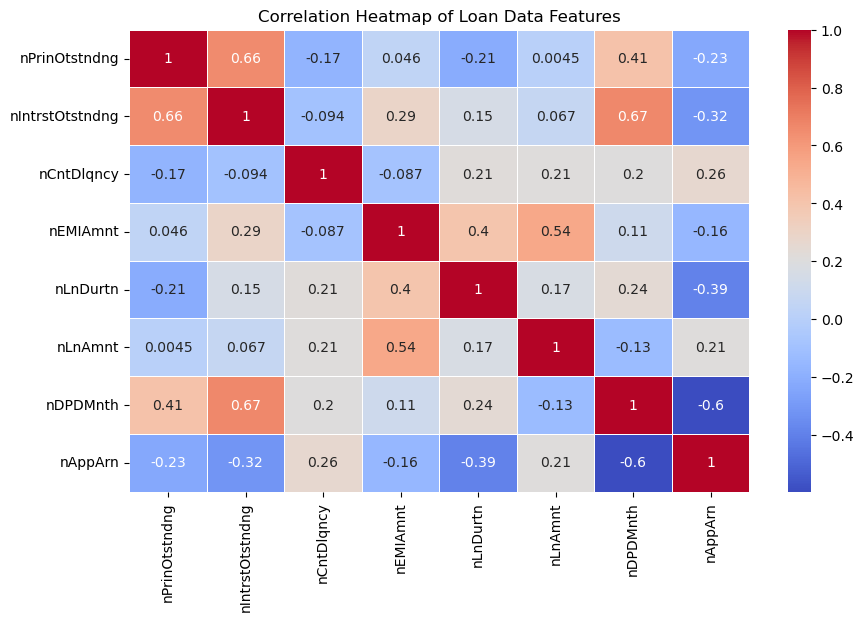

In [18]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the X variables (features) for correlation analysis
X = loan_data[['nPrinOtstndng', 'nIntrstOtstndng', 'nCntDlqncy', 
               'nEMIAmnt', 'nLnDurtn', 'nLnAmnt', 'nDPDMnth', 'nAppArn']]

# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the heatmap using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Loan Data Features')
plt.show()


In [27]:
# Preprocessing: Selecting relevant features for loan default prediction
# Assuming 'fNPL' is the target variable (1 = Default, 0 = Non-default)
X = loan_data[['nPrinOtstndng', 'nIntrstOtstndng', 
               'nEMIAmnt', 'nLnAmnt', 'nAppArn']]
y = loan_data['fNPL']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training: Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8808888888888889

Classification Report:
               precision    recall  f1-score   support

           N       0.90      0.68      0.77      1351
           Y       0.88      0.97      0.92      3149

    accuracy                           0.88      4500
   macro avg       0.89      0.82      0.85      4500
weighted avg       0.88      0.88      0.88      4500


Confusion Matrix:
 [[ 922  429]
 [ 107 3042]]


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preprocessing: Selecting relevant features for loan default prediction
# Assuming 'fNPL' is the target variable (1 = Default, 0 = Non-default)
X = loan_data[['nPrinOtstndng', 'nIntrstOtstndng', 
               'nEMIAmnt', 'nLnAmnt', 'nAppArn']]
y = loan_data['fNPL']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (important for Logistic Regression, but optional for Decision Tree)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training: Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9368888888888889

Classification Report:
               precision    recall  f1-score   support

           N       0.90      0.89      0.89      1351
           Y       0.95      0.96      0.95      3149

    accuracy                           0.94      4500
   macro avg       0.93      0.92      0.92      4500
weighted avg       0.94      0.94      0.94      4500


Confusion Matrix:
 [[1208  143]
 [ 141 3008]]


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Preprocessing: Selecting relevant features for loan default prediction
# Assuming 'fNPL' is the target variable (1 = Default, 0 = Non-default)
X = loan_data[['nPrinOtstndng', 'nIntrstOtstndng', 
               'nEMIAmnt', 'nLnAmnt', 'nAppArn']]
y = loan_data['fNPL']

# Splitting the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (important for Logistic Regression, but optional for Random Forest)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training: Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_scaled)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9468888888888889

Classification Report:
               precision    recall  f1-score   support

           N       0.91      0.91      0.91      1351
           Y       0.96      0.96      0.96      3149

    accuracy                           0.95      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.95      0.95      0.95      4500


Confusion Matrix:
 [[1229  122]
 [ 117 3032]]
